In [1]:
train_file_path = r'D:\iNeuron\Complete Project\CI-CD Pipeline\machine_learning_project\housing\artifact\data_ingestion\2022-11-28-16-30-19\ingested_data\train\housing.csv'
test_file_path = r'D:\iNeuron\Complete Project\CI-CD Pipeline\machine_learning_project\housing\artifact\data_ingestion\2022-11-28-16-30-19\ingested_data\test\housing.csv'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(train_file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.95,35.32,29,3480,608.0,2007,541,3.2738,78700,INLAND
1,-121.96,37.76,8,3865,463.0,1548,432,9.7037,425100,<1H OCEAN
2,-116.97,33.13,10,5149,851.0,2177,783,6.7957,287500,<1H OCEAN
3,-121.88,37.67,25,2244,301.0,937,324,6.4524,296900,INLAND
4,-121.52,38.58,24,938,275.0,508,253,1.6420,32500,INLAND


In [4]:
df['median_house_value']

0         78700
1        425100
2        287500
3        296900
4         32500
          ...  
16507    236400
16508    141300
16509    249300
16510    209200
16511    302200
Name: median_house_value, Length: 16512, dtype: int64

In [5]:
X = df.drop('median_house_value',axis = 1)
y = df['median_house_value']

In [6]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.95,35.32,29,3480,608.0,2007,541,3.2738,INLAND
1,-121.96,37.76,8,3865,463.0,1548,432,9.7037,<1H OCEAN
2,-116.97,33.13,10,5149,851.0,2177,783,6.7957,<1H OCEAN
3,-121.88,37.67,25,2244,301.0,937,324,6.4524,INLAND
4,-121.52,38.58,24,938,275.0,508,253,1.6420,INLAND


In [7]:
y.head()

0     78700
1    425100
2    287500
3    296900
4     32500
Name: median_house_value, dtype: int64

In [8]:
df.shape

(16512, 10)

In [9]:
X.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        170
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [10]:
import seaborn as sns

<AxesSubplot:>

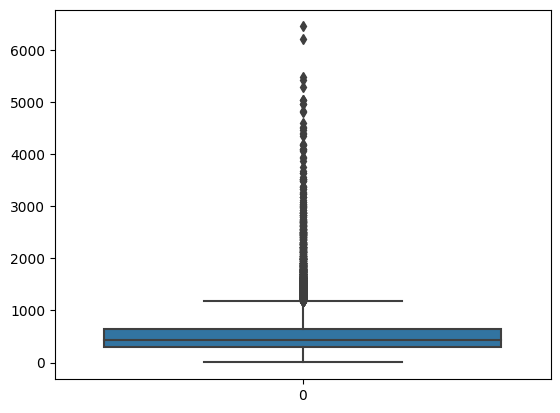

In [11]:
sns.boxplot(X['total_bedrooms'])

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
simple_imputer = SimpleImputer(strategy='median')

In [14]:
numerical_columns = X.drop('ocean_proximity', axis = 1)
numerical_columns.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.95,35.32,29,3480,608.0,2007,541,3.2738
1,-121.96,37.76,8,3865,463.0,1548,432,9.7037
2,-116.97,33.13,10,5149,851.0,2177,783,6.7957
3,-121.88,37.67,25,2244,301.0,937,324,6.4524
4,-121.52,38.58,24,938,275.0,508,253,1.6420


In [15]:
pd.DataFrame(simple_imputer.fit_transform(numerical_columns), columns = numerical_columns.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.95,35.32,29.0,3480.0,608.0,2007.0,541.0,3.2738
1,-121.96,37.76,8.0,3865.0,463.0,1548.0,432.0,9.7037
2,-116.97,33.13,10.0,5149.0,851.0,2177.0,783.0,6.7957
3,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524
4,-121.52,38.58,24.0,938.0,275.0,508.0,253.0,1.6420
...,...,...,...,...,...,...,...,...
16507,-118.14,34.05,39.0,1880.0,367.0,954.0,349.0,3.8750
16508,-120.18,39.28,14.0,10098.0,1545.0,701.0,254.0,4.0819
16509,-120.45,34.71,21.0,1868.0,268.0,522.0,255.0,6.4678
16510,-117.87,34.14,30.0,2495.0,586.0,1139.0,559.0,2.9375


In [16]:
numerical_columns.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [17]:
(pd.DataFrame(simple_imputer.fit_transform(numerical_columns), columns = numerical_columns.columns)).isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [18]:
simple_imputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2121.     ,  434.     ,
       1163.     ,  408.     ,    3.53715])

In [19]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [20]:
room_per_house = df['total_rooms']/df['households']
room_per_house

0         6.432532
1         8.946759
2         6.575990
3         6.925926
4         3.707510
           ...    
16507     5.386819
16508    39.755906
16509     7.325490
16510     4.463327
16511     7.405882
Length: 16512, dtype: float64

In [21]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [22]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin

In [23]:
COLUMN_TOTAL_ROOMS = df['total_rooms']
COLUMN_POPULATION = df['population']
COLUMN_HOUSEHOLDS = df['households']
COLUMN_TOTAL_BEDROOM = df['total_bedrooms']

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise e

In [24]:
num_pipeline = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

In [25]:
cat_pipeline = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('oneHotEncoder',OneHotEncoder())
])

In [26]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [27]:
num_columns = ['longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income']

cat_columns = ['ocean_proximity']

In [28]:
preprocessing = ColumnTransformer([
    ('numerical_pipeline',num_pipeline,num_columns),
    ('categorical_pipeline',cat_pipeline,cat_columns)
])

In [29]:
train_df = preprocessing.fit_transform(df)
train_df

array([[ 0.31018192, -0.14770334,  0.03106498, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19619273,  0.99346046, -1.64158172, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.30108617, -1.17194461, -1.48228204, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.44050312, -0.43299429, -0.60613376, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.85067515, -0.69957763,  0.11071483, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80563405, -0.77440804, -0.28753439, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
preprocessing.fit_transform(df)

array([[ 0.31018192, -0.14770334,  0.03106498, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19619273,  0.99346046, -1.64158172, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.30108617, -1.17194461, -1.48228204, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.44050312, -0.43299429, -0.60613376, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.85067515, -0.69957763,  0.11071483, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80563405, -0.77440804, -0.28753439, ...,  0.        ,
         0.        ,  0.        ]])

In [31]:
test_df = pd.read_csv(test_file_path)
test_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,4741,-118.35,34.05,47.0,2815.0,679.0,1533.0,594.0,2.5806,234100.0,<1H OCEAN
1,13220,-117.70,34.00,15.0,4905.0,711.0,2711.0,762.0,5.7021,193100.0,INLAND
2,5126,-118.28,33.99,38.0,1454.0,323.0,1098.0,297.0,1.5109,104000.0,<1H OCEAN
3,3425,-118.43,34.28,30.0,1384.0,308.0,2054.0,301.0,3.0132,142600.0,<1H OCEAN
4,18796,-122.31,40.89,18.0,754.0,161.0,247.0,107.0,2.2583,78800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
4123,3191,-119.81,36.28,24.0,544.0,112.0,442.0,106.0,3.1071,56100.0,INLAND
4124,18379,-121.87,37.22,26.0,1921.0,250.0,725.0,253.0,7.6933,405900.0,<1H OCEAN
4125,11820,-121.08,38.95,18.0,1931.0,380.0,1271.0,377.0,2.7463,156100.0,INLAND
4126,15695,-122.45,37.79,52.0,3069.0,579.0,1107.0,536.0,5.5634,500001.0,NEAR BAY


In [32]:
y_test = test_df['median_house_value']
y_test = np.array(y_test)
y_test

NameError: name 'np' is not defined

In [ ]:
X_test = preprocessing.transform(test_df)

In [ ]:
import dill

In [ ]:
with open('preprocessing.pkl','wb') as preprocessing_file:
    dill.dump(preprocessing,preprocessing_file)

In [ ]:
with open('preprocessing.pkl','rb') as obj_file:
    load_file = dill.load(obj_file)

In [ ]:
load_file

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHotEncoder',
                                                  OneHotEncoder())]),
                                 ['ocean_proximity'])])

In [ ]:
load_file.transform(test_df)

array([[ 0.61045594, -0.74166974,  1.46476216, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93575279, -0.76505424, -1.08403282, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6454879 , -0.76973114,  0.74791357, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.75579084,  1.55001166, -0.84508329, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44141651,  1.00749116,  1.86301137, ...,  0.        ,
         1.        ,  0.        ],
       [-0.94596438,  1.36761252,  1.86301137, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [ ]:
X = train_df 
X

array([[ 0.31018192, -0.14770334,  0.03106498, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19619273,  0.99346046, -1.64158172, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.30108617, -1.17194461, -1.48228204, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.44050312, -0.43299429, -0.60613376, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.85067515, -0.69957763,  0.11071483, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80563405, -0.77440804, -0.28753439, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
import numpy as np 

In [ ]:
y = df['median_house_value']
y = np.array(y)
y

array([ 78700., 425100., 287500., ..., 249300., 209200., 302200.])

In [ ]:
lr.fit(X,y)

LinearRegression()

In [ ]:
y_pred = lr.predict(X)
y_pred

array([131015.19606621, 412553.04501259, 309773.89244872, ...,
       363766.91062064, 157045.72236365, 275088.68791376])

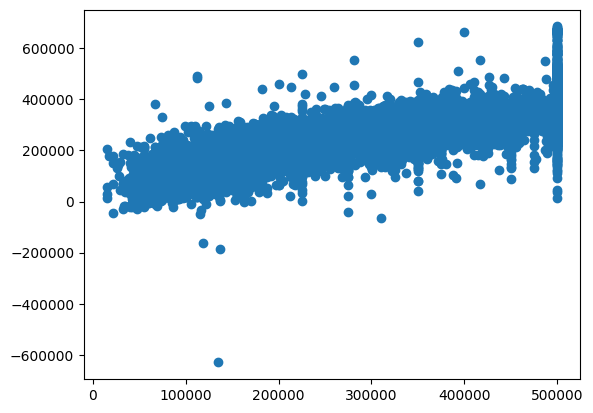

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(y,y_pred,'o')

In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
r2_score(y,y_pred)

0.6434895514900794

In [ ]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([208958.20567782, 199586.71386877, 133002.83826447, ...,
        70064.35677268, 343417.81211753, 171476.73017028])

In [ ]:
r2_score(y_test_pred, y_test)

0.44923213303738607

In [ ]:
from housing.util.util import read_yaml_file

In [ ]:
schema = r'D:\iNeuron\Complete Project\CI-CD Pipeline\machine_learning_project\config\schema.yaml'
read_yaml_file(schema)

{'columns': {'longitude': 'float',
  'latitude': 'float',
  'housing_median_age': 'float',
  'total_rooms': 'float',
  'total_bedrooms': 'float',
  'population': 'float',
  'households': 'float',
  'median_income': 'float',
  'median_house_value': 'float',
  'ocean_proximity': 'category'},
 'numerical_columns': ['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income'],
 'categorical_columns': ['ocean_proximity'],
 'target_column': 'median_house_value',
 'domain_value': {'ocean_proximity': ['<1H OCEAN',
   'INLAND',
   'ISLAND',
   'NEAR BAY',
   'NEAR OCEAN']}}

In [53]:
from housing.util.util import read_yaml_file

In [58]:
file= r'D:\iNeuron\Complete Project\CI-CD Pipeline\machine_learning_project\config\schema.yaml'
read_yaml_file(file)['numerical_columns']

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [59]:
numerical_columns = read_yaml_file(file)['numerical_columns']

In [68]:
schema_file_path = r'D:\iNeuron\Complete Project\CI-CD Pipeline\machine_learning_project\config\schema.yaml'

In [69]:
read_yaml_file(schema_file_path)['numerical_columns']

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [70]:
read_yaml_file(schema_file_path)['categorical_columns']

['ocean_proximity']